In [1]:
import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def lyricfreq(region):

	from os import listdir
	import pandas as pd
	import nltk
	import string
	from string import punctuation
	from nltk.corpus import stopwords
	from nltk.probability import FreqDist

	lyric_df = pd.DataFrame(columns=['name','lyrics'])


	for lyricfile in listdir(region):
	    lyricfile = (region)+(lyricfile)
	    #print(lyricfile)
	    rawlyrics= pd.read_json(lyricfile)
	    songs = rawlyrics.get('songs')
	    
	    for x in songs:
	        lyric_df = lyric_df.append({
	            'name': x.get('title'),
	            'lyrics': x.get('lyrics')
	        }, ignore_index=True)
	    
	#lyric_df.shape




	#creates a string containing the lyrics of every song in the lyrics dataframe
	lyrics = ''.join(lyric_df.lyrics)
	#removes punctuation

	removal_string = string.punctuation+("""’""") #genius.com uses a special ’ character
	transtable = str.maketrans('','',removal_string)
	lyrics_punct = lyrics.translate(transtable)



	#tokenizes string and finds frequency of each word (counts punctuation as a word)
	 
	stop_words = stopwords.words('english')
	#the two most common contractions that aren't in stopwords.words,
	#as well as words used to denote the sections of a song
	stop_words.extend(['im','ill','verse','hook','chorus','bridge']) 
	stop_words = set(stop_words) #element removal is faster using set than list

	word_tokens = nltk.word_tokenize(lyrics_punct) 
	word_tokens = [w.lower() for w in word_tokens]

	filtered_tokens = [w for w in word_tokens if w not in stop_words] 
	#print(filtered_tokens)

	fd = FreqDist(filtered_tokens)

	fd.plot(20, cumulative = False)
	return fd

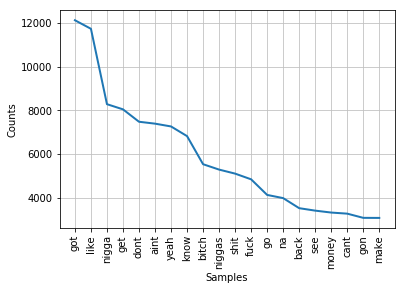

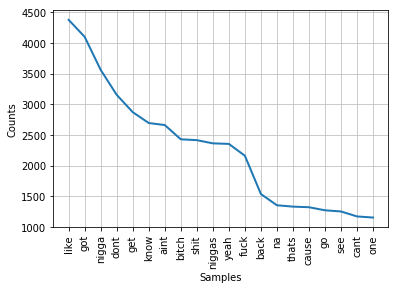

In [3]:
east = lyricfreq('eastcoast\\')
west = lyricfreq('westcoast\\')

In [98]:
def returnMatches(a, b):
    return [x for x in a if x in b]

def returnNotMatches(a, b):
    return [[x for x in a if x in b], [x for x in b if x not in a]]

In [99]:
eastlist = []
westlist = []

for line in east:
    eastlist.append(line);
    
for line in west:
    westlist.append(line);
    
matches= returnMatches(eastlist,westlist)
nm_east , nm_west = returnNotMatches(eastlist, westlist)


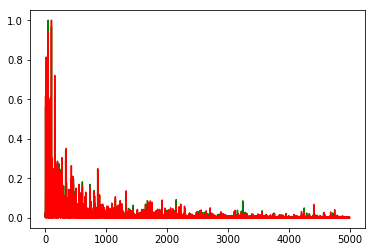

In [113]:
eastfreqfull = []
westfreqfull = []

for line in matches:
    eastfreqfull.append(east.get(line));
    westfreqfull.append(west.get(line));

eastfreq = np.array(eastfreqfull[0:5000])
westfreq = np.array(westfreqfull[0:5000])

eastfreq = eastfreq/eastfreq.max()
westfreq = westfreq/westfreq.max()

plt.plot(eastfreq, 'g')
plt.plot(westfreq,'r')

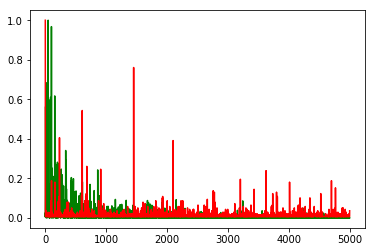

In [107]:
eastfreqfull = []
westfreqfull = []

for line in nm_east:
    eastfreqfull.append(east.get(line));
    
for line in nm_west:
    westfreqfull.append(west.get(line));

eastfreq = np.array(eastfreqfull[0:5000])
westfreq = np.array(westfreqfull[0:5000])

eastfreq = eastfreq/eastfreq.max()
westfreq = westfreq/westfreq.max()

plt.plot(eastfreq, 'g')
plt.plot(westfreq,'r')

In [112]:
for word in matches:
    if 

absoul
soulo
20000
figg
aminé
pads
sweatshirt
gibbs
adhd
otf
checc
gangstagangsta
withchu
dup
alameda
skurr
chitty
bicken
bollective
